In [201]:
import numpy as np, pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Reading data and checking for NULLs

In [156]:
df = pd.read_csv('train_E1GspfA.csv')
df['date'] = pd.to_datetime(df['date'])
date_col = 'date'

In [157]:
df.shape

(18247, 3)

In [158]:
df.isna().sum()

# NO NULL VALUES IN TRAIN DATA

date      0
hour      0
demand    0
dtype: int64

In [159]:
df = df.sort_values(['date', 'hour'])

### Preprocessing - Adding date and hour related columns 

In [160]:
def date_process(df, date_col = 'date'):
    
    # FUNCTION TO ADD DATE AND HOUR SPECIFIC COLUMNS
    # TO SHOW THE EFFECTS OF SPECIAL DAYS LIKE YEAR END, FESTIVALS, ETC
    
    
    # DATE - ADDING COLUMNS FOR SPECIFIC CALENDAR EVENTS LIKE QUARTER-START, YEAR-END, ETC.
    
    df['day_of_month'] = df[date_col].apply(lambda x: x.day)
    
    df['day_of_year'] = df[date_col].apply(lambda x: x.dayofyear)
    
    df['is_month_start'] = df[date_col].apply(lambda x: x.is_month_start)
    
    df['is_month_end'] = df[date_col].apply(lambda x: x.is_month_end)
    
    df['is_quarter_start'] = df[date_col].apply(lambda x: x.is_quarter_start)
    
    df['is_quarter_end'] = df[date_col].apply(lambda x: x.is_quarter_end)
    
    df['month'] = df[date_col].dt.month
    
    df['week'] = df[date_col].apply(lambda x: x.week)
    
    df['week_of_year'] = df[date_col].apply(lambda x: x.weekofyear)
    
    df['is_year_start'] = df[date_col].apply(lambda x: x.is_year_start)
    
    df['is_year_end'] = df[date_col].apply(lambda x: x.is_year_end)
    
    df['quarter'] = df[date_col].apply(lambda x: x.quarter)
    
    df['day_of_week'] = df[date_col].apply(lambda x: x.dayofweek)
    
    df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x in [5,6] else 0)
    
    df['year'] = df['date'].dt.year

    
    # ADDING COVID PERIOD RELATED COLUMNS LIKE LOCKDOWN, 1ST WAVE, ETC. TO CAPTURE POSSIBLE CHANGE IN CAB DEMAND DUE TO COVID.
    
    df['is_covid_year'] = df['date'].dt.year.apply(lambda x: 1 if x in [2020, 2021] else 0)

    df['is_covid_first_wave'] = df['date'].apply(lambda x: 1 if x in pd.date_range('2020-03-20','2020-06-01') else 0)

    df['is_covid_second_wave'] = df['date'].apply(lambda x: 1 if x in pd.date_range('2021-02-27','2021-05-25') else 0)

    df['is_covid_third_wave'] = df['date'].apply(lambda x: 1 if x in pd.date_range('2022-01-01','2022-02-15') else 0)

    df['is_first_lockdown'] = df['date'].apply(lambda x: 1 if x in pd.date_range('2020-03-20','2020-06-30') else 0)

    df['is_second_lockdown'] = df['date'].apply(lambda x: 1 if x in pd.date_range('2021-03-20','2021-05-01') else 0)

    
    # ADDING COLUMNS FOR SOME INDIAN AND INTERNATIONAL FESTIVALS
    
    df['is_christmas'] = df['date'].apply(lambda x: 1 if ((x.month == 12) & (x.day == 25)) else 0) # christmas

    df['is_vday'] = df['date'].apply(lambda x: 1 if ((x.month == 2) & (x.day == 14)) else 0) # valentine's

    df['is_4july'] = df['date'].apply(lambda x: 1 if ((x.month == 7) & (x.day == 4)) else 0) # us independence

    df['is_15august'] = df['date'].apply(lambda x: 1 if ((x.month == 8) & (x.day == 15)) else 0) # indian independence

    df['is_26jan'] = df['date'].apply(lambda x: 1 if ((x.month == 1) & (x.day == 26)) else 0) # indian republic day

    df['is_dussehra_month'] = df['date'].apply(lambda x: 1 if (x.month == 10) else 0) 

    df['is_dussehra_period1'] = df['date'].apply(lambda x: 1 if ((x.month == 10) & (x.day <= 15)) else 0)

    df['is_dussehra_period2'] = df['date'].apply(lambda x: 1 if ((x.month == 10) & (x.day > 15)) else 0)

    df['is_diwali_month'] = df['date'].apply(lambda x: 1 if (x.month == 11) else 0) 

    df['is_diwali_period1'] = df['date'].apply(lambda x: 1 if ((x.month == 11) & (x.day <= 15)) else 0)

    df['is_diwali_period2'] = df['date'].apply(lambda x: 1 if ((x.month == 11) & (x.day > 15)) else 0)

    df['is_holi_month'] = df['date'].apply(lambda x: 1 if (x.month == 3) else 0) 

    
    # HOUR - ADDING COLUMNS TO REFLECT SPECIAL HOURS DURING THE DAY LIKE OFFICE COMMUTE TIME, NIGHT TIME, ETC.

    df['hour_morning_commute1'] = df['hour'].apply(lambda x: 1 if x in [9,10,11] else 0)

    df['hour_morning_commute2'] = df['hour'].apply(lambda x: 1 if x in [10,11,12] else 0)

    df['hour_morning_commute3'] = df['hour'].apply(lambda x: 1 if x in [10] else 0)

    df['hour_morning_commute4'] = df['hour'].apply(lambda x: 1 if x in [9, 10] else 0)

    df['hour_morning_commute5'] = df['hour'].apply(lambda x: 1 if x in [10, 11] else 0)

    df['hour_evening_commute'] = df['hour'].apply(lambda x: 1 if x in [6,7,8] else 0)

    df['hour_lunch'] = df['hour'].apply(lambda x: 1 if x in [12,13,14] else 0)

    df['hour_night'] = df['hour'].apply(lambda x: 1 if x in [23,0,1,2,3,4,5] else 0)

    df['hour_dinner'] = df['hour'].apply(lambda x: 1 if x in [20,21,22] else 0)

    df['hour_club_start'] = df['hour'].apply(lambda x: 1 if x in [21,22,23] else 0)

    df['hour_club_end'] = df['hour'].apply(lambda x: 1 if x in [23,0,1, 2] else 0)

    df['hour_early_morning'] = df['hour'].apply(lambda x: 1 if x in [5,6,7,8] else 0)

    df['hour_late_morning'] = df['hour'].apply(lambda x: 1 if x in [9,10] else 0)

    df['hour_forenoon'] = df['hour'].apply(lambda x: 1 if x in [10,11] else 0)

    df['hour_noon'] = df['hour'].apply(lambda x: 1 if x in [12,13] else 0)

    df['hour_afternoon'] = df['hour'].apply(lambda x: 1 if x in [14,15,16] else 0)

    df['hour_early_evening'] = df['hour'].apply(lambda x: 1 if x in [17,18] else 0)

    df['hour_late_evening1'] = df['hour'].apply(lambda x: 1 if x in [18,19] else 0)

    df['hour_late_evening2'] = df['hour'].apply(lambda x: 1 if x in [19,20, 21] else 0)

    df['hour_pre_midnight'] = df['hour'].apply(lambda x: 1 if x in [22,23] else 0)

    df['hour_post_midnight'] = df['hour'].apply(lambda x: 1 if x in [0,1,2] else 0)

    df['hour_pre_dawn1'] = df['hour'].apply(lambda x: 1 if x in [3,4,5] else 0)

    df['hour_pre_dawn2'] = df['hour'].apply(lambda x: 1 if x in [4,5] else 0)
    
    print('Final df shape', df.shape)
    
    return df.copy()

In [161]:
df = date_process(df)

Final df shape (18247, 59)


In [162]:
# LET US SEE HOW THE DATAFRAME LOOKS NOW

df.head(2)

,date,hour,demand,day_of_month,day_of_year,is_month_start,is_month_end,is_quarter_start,is_quarter_end,month,...,hour_forenoon,hour_noon,hour_afternoon,hour_early_evening,hour_late_evening1,hour_late_evening2,hour_pre_midnight,hour_post_midnight,hour_pre_dawn1,hour_pre_dawn2
0,2018-08-18,9,91,18,230,False,False,False,False,8,...,0,0,0,0,0,0,0,0,0,0
1,2018-08-18,10,21,18,230,False,False,False,False,8,...,1,0,0,0,0,0,0,0,0,0


In [83]:
# CHECK TO SEE NULL VALUES
df.isna().sum().sum()

0

### CREATING TRAIN AND VALIDATION SETS

In [86]:
df.shape

(18247, 59)

In [1]:
# SINCE THIS IS A TIME BASED PREDICTION DATASET, WE CANNOT TAKE RANDOM SAMPLES FOR VALIDATION. 
# THE VALIDATION 'DATE' AND 'HOUR' SHOULD NOT COINCIDE WITH TRAIN 'DATE' AND 'HOUR'. THIS WILL LEAD TO DATA LEAKAGE.
# WE WILL TAKE NON-OVERLAPPING TRAIN AND VALIDATION PERIODS.

In [170]:
# DECIDE THE TRAIN-VALIDATION RATIO FOR MODEL TRAINING

train_ratio = 0.7
train_size = round(df.shape[0]*train_ratio)
train_size

12773

In [96]:
# DROP THE 'DATE' AND 'HOUR' COLUMNS, THEY ARE NO LONGER NEEDED

train_df = df.drop(['date', 'hour'], axis=1)
print('train_df shape', train_df.shape)

# CREATE TRAIN AND VALIDATION SETS
# THEY SHOULD BE NON-OVERLAPPING, TO PREVENT DATA LEAKAGE

# INPUTS
xt = train_df.drop('demand', axis=1)[:train_size]
xv = train_df.drop('demand', axis=1)[train_size:]

# TARGET (DEMAND)
yt = train_df['demand'][:train_size]
yv = train_df['demand'][train_size:]

# SHAPE OF TRAIN AND VALIDATION SETS
xt.shape, yt.shape, xv.shape, yv.shape

train_df shape (18247, 57)


((12773, 56), (12773,), (5474, 56), (5474,))

### TRAINING RANDOM FOREST

In [171]:
# FIT RANDOM FOREST WITH NO REGULARISATION AND SEE FEATURE IMPORTANCE
m = RandomForestRegressor()
m.fit(xt, yt)

val_preds = m.predict(xv)

np.sqrt(mean_squared_error(yv, val_preds))

38.090960033077224

#### FEATURE IMPORTANCE

,index,col,imp,cum_imp
0,1,day_of_year,0.165600,0.165600
1,0,day_of_month,0.157436,0.323037
2,12,day_of_week,0.096186,0.419223
3,30,is_diwali_period1,0.052105,0.471328
4,40,hour_night,0.047945,0.519273
5,14,year,0.047724,0.566997
6,7,week,0.040135,0.607132
7,8,week_of_year,0.039988,0.647121
8,44,hour_early_morning,0.030084,0.677204
9,48,hour_afternoon,0.026081,0.703286


<Figure size 504x504 with 0 Axes>

<BarContainer object of 15 artists>

Text(0.5, 0, 'Importance')

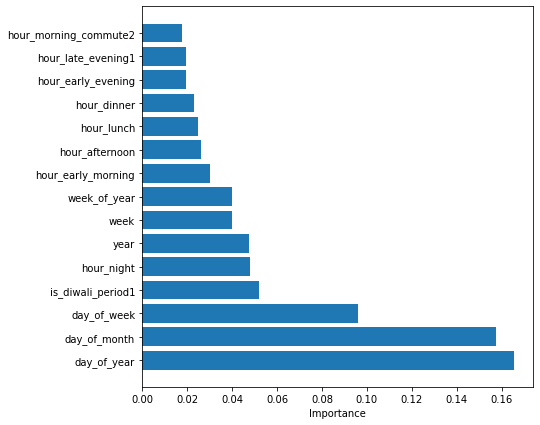

In [209]:
dfimp = pd.DataFrame({'col':xt.columns, 'imp': m.feature_importances_}).sort_values('imp', ascending=False).reset_index()
dfimp['cum_imp'] = dfimp['imp'].cumsum()

# TAKE A LOOK AT 15 MOST IMPORTANT COLUMNS

dfimp[:15]

plt.figure(figsize=(7,7))
plt.barh(dfimp[:15]['col'], dfimp[:15]['imp'])
plt.xlabel('Importance')
plt.show()

#### TOP 3 MOST PREDICTIVE FEATURES ARE DAY_OF_MONTH, DAY_OF_YEAR AND DAY_OF_WEEK

#### MODEL TUNING

In [146]:
# AFTER FURTHER HYPER-PARAM TUNING, FOLLOWING COMBINATION GIVES THE BEST RESULTS

m = RandomForestRegressor(n_estimators= 150, max_features = 0.5, min_samples_leaf = 5, n_jobs=-1, max_samples=0.6)
m.fit(xt, yt)

val_preds = m.predict(xv)

np.sqrt(mean_squared_error(yv, val_preds))

36.36741067896643

### TEST DATA

In [147]:
test = pd.read_csv('test_6QvDdzb.csv')
test['date'] = pd.to_datetime(test['date'])
date_col = 'date'
test = date_process(test)

Final df shape (7650, 58)


In [148]:
test.isna().sum().sum()

# NO NULL VALUES IN TEST DATA

0

In [149]:
test_df = test.drop(['date', 'hour'], axis=1)
print('train_df shape', test_df.shape)

train_df shape (7650, 56)


In [150]:
test_df.head(2)

,day_of_month,day_of_year,is_month_start,is_month_end,is_quarter_start,is_quarter_end,month,week,week_of_year,is_year_start,...,hour_forenoon,hour_noon,hour_afternoon,hour_early_evening,hour_late_evening1,hour_late_evening2,hour_pre_midnight,hour_post_midnight,hour_pre_dawn1,hour_pre_dawn2
0,1,60,True,False,False,False,3,9,9,False,...,0,0,0,0,0,0,0,1,0,0
1,1,60,True,False,False,False,3,9,9,False,...,0,0,0,0,0,0,0,1,0,0


In [151]:
test_preds = m.predict(test_df)

### SUBMISSION

In [211]:
sub = test[['date', 'hour']].copy()
sub['demand'] = test_preds
sub.head(2)

,date,hour,demand
0,2021-03-01,0,49.447832
1,2021-03-01,1,49.447832


In [153]:
f = str(datetime.now())[:19].replace(':', '-')
f = '_'.join(f.split())

file_name = 'sub_' + f + '.csv'
sub.to_csv(file_name, index=False)

#### THANK YOU